Problema del cambio

Encontrar la minima cantidad de monedas para dar cambio. 

In [11]:
# Algoritmo greedy

#las monedas disponibles
coins= [7,5,2,1]

def greed(money):
    res =[]
    while money>0:
        # buscamos la moneda mas alta que no se pasa del dinero que tenemos
        for j in coins:
            # tomando en cuenta que change esta sorted de mayor a menor
            if j <= money:
                coin = j
                break
        # agregamos la moneda a la lista y cambia la cantidad de dinero que falta
        res.append(coin)
        money = money-coin
    return(res)

money = int(input())
print(greed(money))

#El algorimto funciona, pero no necesariamente da la menor cantidad de monedas que se pueden usar
# Para ciertos tipos de change, puede ser que de un resultado con mas monedas de las que deberia. 
#En el caso mostrado, para money = 10, nos da 7+2+1 pero es mas practico tener 5+5

10
[7, 2, 1]


Algoritmo recursivo super ineficiente

In [25]:
#Para encontrar la menor cantidad de monedas para sumar 9, necesitamos conocer la menor 
# cantidad de monedas para llegar a 8 , 3 o 4. Y luego, sumarle una moneda a cada uno de estos casos. 
# Y ver cual es el menor. 

# Con ello, podemos definir una funcion recursiva
coins = [6,5,1]

import numpy as np

#definimos la funcion rechange. Nos da como resultado la minima cantidad de monedas para
# un cierto valor, pero no la combinacion para llegar
def rechange(money,coins):
    # si no tenemos dinero, la cantidad
    if money ==0:
        return(0)
    # La menor cantidad de monedas es infinito por ahora.
    minnumcoins =  np.inf
    
    # Para cada moneda
    for coin in coins:
        # si la cantidad de dinero es meayor a la moneda
        if money >= coin:
            # checamos el numero de monedas que se necesita para llegar a money-coin
            numcoins = rechange(money-coin, coins)
            # ese numero de monedas mas 1 es un posible camino para calcular el numero de monedas
            # para llegar a nuestro monto inicial. Si es menor que el minnumcoins de antes,
            if numcoins+1 < minnumcoins:
                # le asignamos a minnumcoins este camino
                minnumcoins = numcoins + 1
    return(minnumcoins)

rechange(10,coins)

#Sin embargo, es un algoritmo extremadamente ineficiente. 

2

Algoritmo dinamico

En este algoritmo vamos guardando las cantidades de monedas para cada valor y llenamos la tabla de izquierda a derecha en vez de de derecha a izquierda.

In [2]:
import numpy as np


#vamos asignando el minimo de monedas de izquierda a derecha



def dpchange(money, coins):
    #minnumcoins guarda el minimo de monedas de cada valor 0,1,2,...,money
    # en 0, el minimo de monedas es 0
    minnumcoins =[0]
    #para cada otro valor:
    for m in range(1, money +1):
        #primero le asignamos una cantidad infinita de monedas
        minnumcoins.append(np.inf)
        
        #para cada moneda
        for coin in coins:
            # tal que m-coin >= 0 (es decir, esta moneda pudo haber sido usada antes)
            if m >= coin:
                # asignamos numcoins al minimo numero de monedas de m-coin +1 
                #que es la cantidad de monedas si seguimos el camino que pasa por m-coin
                numcoins = minnumcoins[m-coin] + 1
                #Si es menor que la cantidad de monedas minima caluclada para m hasta ahora
                if numcoins< minnumcoins[m]:
                    # actualizamos el valor de minnumcoins[m]
                    minnumcoins[m] = numcoins
    return(minnumcoins[money])


print(dpchange(211,[7,9,5]))

25


String Comparison

Aligmnet Game


Eliminar todos los s'imbolos de dos strings de tal forma que se maximice el numero de puntos. Se puede eliminar solamente el primer simbolo de un str o los primeros dos simbolos de los str a la vez.  Si son el quitamos el primer simbolo de ambos str a la vez y coinciden, ganamos un punto.
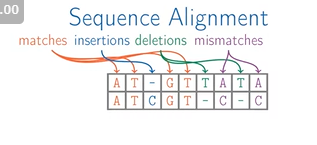

El juego es equivalente a poner el primer y segundo str con posiblmente espacios. Con ello, podemos clasificar los puntos como: 1 punto por cada match. Y una penalizacion - mu cuando hay un mismatch y un - sigma cuando hay inserciones o delecions. 
Esto nos da los pasos de como pasar del primer str al segundo. 
Dados dos str nos interesa encontrar la forma de maximizar el puntaje (matches) - mu(mismatchs)- sigma(indel).

Esto es una generalizacion del problema de antes. Y si queremos encontar la maxima subcadena entre cambos str, debemos poner mu = sigma = 0 y entonces buscamos maximizar los matchs

Edit Distance

Dados dos str, definimos la edit distance entre ellos como la menor cantidad de deleciones, mismatches, insersiones tales que podemos pasar del primer str al segundo.
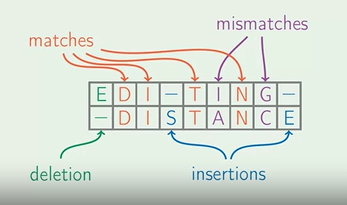

El problema de edit distance es equivalente al de alignmemt para sigma = -1/2 y mu = 0

Calcular la edit distance

Empezamos con dos str A[1, ..., n] y B[1, ..., m] buscamos un alignment entre el i-prefijo de A y el j-prefijo de B. 
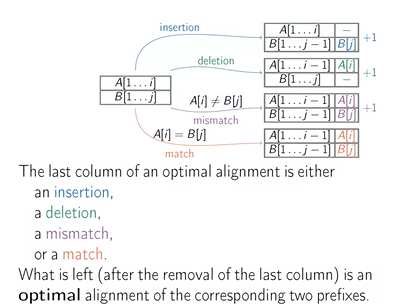

Definimos D(i,j) como la edit distance entre el i-prefijo de A y el j-prefijo de B. Y tenemos una formula recursiva
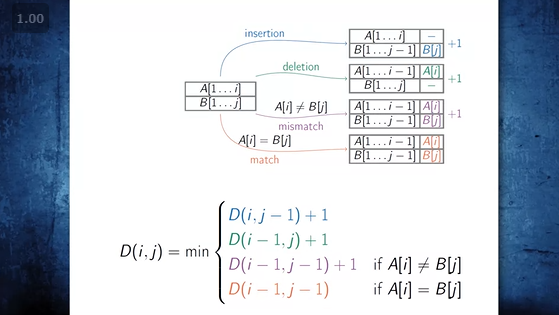

Nuestro problema ahora es calcular D(n,m). Lo cual podemos hacer con programacion dinamica llenando una tabla con todos los valores D(i,j). Vemos el ejemplo de la distancia entre distance y editing.  Y guardamos los pasos tambien 
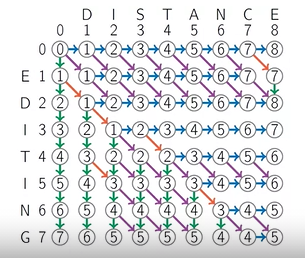

In [15]:
#Implementamos la edit distance
import numpy as np
#La edit distance entre el str A y el B

def editdistance(A,B):
    n = len(A)
    m = len(B)
    D = np.zeros((n+1,m+1))
    
    #Llenamos la primera columna y la primera fila
    # Claramente la editing distance entre i-prefijo de A y vacio es i.
    
    for i in range(n+1):
        D[i,0] = i
    for j in range(m+1):
        D[0,j]= j
    
    #iteramos sobre toda la matriz
    for j in range(1,m+1):
        for i in range(1,n+1):
            # Calculamos los distintos posibles valores
            insertion = D[i,j-1] + 1
            deletion = D[i-1,j]+ 1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1] +1
            
            #Si hay un match, consideramos el match
            if A[i-1] == B[j-1]:
                D[i,j] = min(insertion, deletion, match)
            #Si no hay un match, no
            else:
                D[i,j] = min(insertion, deletion, mismatch)
            
    return(D)
    
print(editdistance("editing","distance"))

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 2. 3. 4. 5. 6. 7. 7.]
 [2. 1. 2. 3. 4. 5. 6. 7. 8.]
 [3. 2. 1. 2. 3. 4. 5. 6. 7.]
 [4. 3. 2. 2. 2. 3. 4. 5. 6.]
 [5. 4. 3. 3. 3. 3. 4. 5. 6.]
 [6. 5. 4. 4. 4. 4. 3. 4. 5.]
 [7. 6. 5. 5. 5. 5. 4. 4. 5.]]


Reconstruir el alignment

Para hacer esto, necesitamos transversar la matriz D(i,j) de 0,0 a n,m
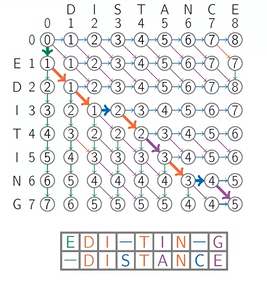

Pero este path construido no es el optimal. Para construir el optimal, necesitamos empezar desde el ultimo elemento de la matriz e ir yendo hacia atras con las elecciones que habiamos calculado antes
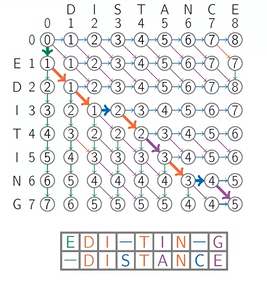

In [89]:
#Implementamos la edit distance con backtrack
import numpy as np
#La edit distance entre el str A y el B

#De hecho, el backtrack aqui no es necesario. Se puede hacer un backtrack
# en una funcion a parte como en el ejercicio de la calculadora

def editdistance(A,B):
    n = len(A)
    m = len(B)
    #la matrz  D(i,j) tiene la editing distance entre A_i y B_j
    D = np.zeros((n+1,m+1))
    # la matriz CAM(i,j) nos dice el paso con el que se lleg'o a D(i,j), ya sea 
    # diagonal (mis)match, deletion (vertical), insertion (hor). 
    # denotaremos (mis)mathc por 0, deletion por -1 e insertion por 1
    
    CAM = np.zeros((n+1,m+1))
    
    #Llenamos la primera columna y la primera fila
    # Claramente la editing distance entre i-prefijo de A y vacio es i.
    #Ademas, a D(i,0) se llega claramente por una deletion
    
    for i in range(n+1):
        D[i,0] = i
        CAM[i,0] = -1
        
    for j in range(m+1):
        D[0,j]= j
        CAM[0,j] = 1
    
    #Ponemos el primer de CAM[0,0] como inf, porque ni tiene sentid
    CAM[0,0] = np.inf
    
    #iteramos sobre toda la matriz
    for j in range(1,m+1):
        for i in range(1,n+1):
            # Calculamos los distintos posibles valores
            insertion = D[i,j-1] + 1
            deletion = D[i-1,j]+ 1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1] +1
            
            #Encontramos el minimo de estos pasos
            # si hay un match
            if A[i-1] == B[j-1]:
                # ponemos el min considerando el match
                mini = min(insertion, deletion, match)
                D[i,j] = mini
                # y vemos de donde vino para guardar el camino en B
                
                if insertion == mini:
                    CAM[i,j] =1 
                elif deletion == mini:
                    CAM[i,j] = -1
                elif match == mini:
                    CAM[i,j] = 0
                    
                
            #Si no hay un match, no
            else:
                mini = min(insertion, deletion, mismatch)
                
                # ponemos el min considerando el mismatch
                D[i,j] = mini
                # y vemos de donde vino para guardar el camino en B
                
                if insertion == mini:
                    CAM[i,j] =1 
                elif deletion == mini:
                    CAM[i,j] = -1
                    
                elif mismatch == mini:
                    CAM[i,j]= 0.1
                    
                
            
    return(D,CAM)


    
    
    
    
res= editdistance("2783","5287")
print(res[0])
print(res[1])

[[0. 1. 2. 3. 4.]
 [1. 1. 1. 2. 3.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 2. 3.]
 [4. 4. 4. 3. 3.]]
[[ inf  1.   1.   1.   1. ]
 [-1.   0.1  0.   1.   1. ]
 [-1.  -1.  -1.   0.1  0. ]
 [-1.  -1.  -1.   0.   1. ]
 [-1.  -1.  -1.  -1.   0.1]]


Ejercicios

1. Money change again. 
Encuentra el minimo numero de monedas de denominacion 1,3,4 para formar n

In [41]:
import numpy as np


#vamos asignando el minimo de monedas de izquierda a derecha
n = int(input())
def dpchange(money, coins):
    #minnumcoins guarda el minimo de monedas de cada valor 0,1,2,...,money
    # en 0, el minimo de monedas es 0
    minnumcoins =[0]
    #para cada otro valor:
    for m in range(1, money +1):
        #primero le asignamos una cantidad infinita de monedas
        minnumcoins.append(np.inf)
        
        #para cada moneda
        for coin in coins:
            # tal que m-coin >= 0 (es decir, esta moneda pudo haber sido usada antes)
            if m >= coin:
                # asignamos numcoins al minimo numero de monedas de m-coin +1 
                #que es la cantidad de monedas si seguimos el camino que pasa por m-coin
                numcoins = minnumcoins[m-coin] + 1
                #Si es menor que la cantidad de monedas minima caluclada para m hasta ahora
                if numcoins< minnumcoins[m]:
                    # actualizamos el valor de minnumcoins[m]
                    minnumcoins[m] = numcoins
    return(minnumcoins[money])


print(dpchange(n,[1,3,4]))

545
137


2. Primitive calculator

Tenemos una calculadora que solo puede multiplicar poe 2, multiplicar por 3 o sumar 1. Dado un numero n, encontrar el minimo numero de operaciones para llegar a n empezando desde 1

In [71]:
import numpy as np

#input es el numero n
n = int(input())

# Implrimir el camino que se va siguiendo en la calculadora



def calc(n):
    
    # cuentas cuenta el numero de cuentas para llegar hasta n. Para 0 y 1 son 0
    cuentas = np.ones(n+1) * np.inf
    cuentas[0] = 0
    cuentas[1] = 0
    
    
    #para cada otro valor (para 1, las cuentas son 0)
    for m in range(2,n+1):
        #primero le asignamos una cantidad infinita de monedas
        
        
        # Vamos viendo cada operacion (posible) y vemos cual es el mejor camino
        
        if m % 2 ==0:
            if cuentas[int(m/2)] +1 < cuentas[m]:
                cuentas[m] = cuentas[int(m/2)] +1
                
        if m % 3 ==0:
            if cuentas[int(m/3)] +1 < cuentas[m]:
                cuentas[m] = cuentas[int(m/3)] +1
        
        if cuentas[m-1] + 1 < cuentas[m]:
            cuentas[m] = cuentas[m-1]+1
        
    return(cuentas)


def reconstruir(n):
    cuentas = calc(n)
    # res da el camino que seguimos (al rev'es)
    res = []
    
    #empezamos (acabamos) en n
    res.append(n)
    
    #vamos viendo cual fue la operacion que nos llevo a n y vamos bajando
    while n >1:
        if n % 2 ==0 and cuentas[int(n/2)] == cuentas[n] -1:
            res.append(int(n/2))
            n = int(n/2)
        elif n % 3 ==0 and cuentas[int(n/3)] == cuentas[n] -1:
            res.append(int(n/3))
            n = int(n/3)
        elif cuentas[n-1] == cuentas[n]-1:
            res.append(int(n-1))
            n = int(n-1)
    
    return(res)



sol = reconstruir(n)
sol.reverse()
print("\n")
print(int(calc(n)[-1]))
print(*sol)

96234


14
1 3 9 10 11 33 99 297 891 2673 8019 16038 16039 48117 96234


3. Edit Distance

Da la edit distance entre dos strings

In [82]:
#Implementamos la edit distance con backtrack
import numpy as np
#La edit distance entre el str A y el B



def editdistance(A,B):
    n = len(A)
    m = len(B)
    #la matrz  D(i,j) tiene la editing distance entre A_i y B_j
    D = np.zeros((n+1,m+1))
    
    #Llenamos la primera columna y la primera fila
    # Claramente la editing distance entre i-prefijo de A y vacio es i.
    for i in range(n+1):
        D[i,0] = i
        
    for j in range(m+1):
        D[0,j]= j 
    #iteramos sobre toda la matriz
    for j in range(1,m+1):
        for i in range(1,n+1):
            # Calculamos los distintos posibles valores
            insertion = D[i,j-1] + 1
            deletion = D[i-1,j]+ 1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1] +1
            
            #Encontramos el minimo de estos pasos
            # si hay un match
            if A[i-1] == B[j-1]:
                # ponemos el min considerando el match
                D[i,j] = min(insertion, deletion, match)
                
            #Si no hay un match, no
            else:
                D[i,j] = min(insertion, deletion, mismatch)
                # ponemos el min considerando el mismatch
                
                
            
    return(D)


A = str(input())
B = str(input())

D = editdistance(A,B)
print(int(D[-1,-1]))
    
    
    

2783
5287
3


4. Maxima subsecuencia comun entre dos secuencias


In [21]:
#Buscamos la longitud de la subcadena mas larga entre dos str (se pueden saltar
# elementos). Por ejemplo, entre 2783 , 5287 la longitud mas larga es 27 o 28. 
#En cualquier caso, solo hay que decir la longitud, que es 2. 

# Para ello, calculare la edit distance entre los str y ver'e cu'anto de esa 
#edit distance se debe a matches, con lo que ya nos dar'a la longitud 
# maxima de subcadena. 


import numpy as np



def editdistance(A,B):
    n = len(A)
    m = len(B)
    #la matrz  D(i,j) tiene la editing distance entre A_i y B_j
    D = np.zeros((n+1,m+1))
    # la matriz CAM(i,j) nos dice el paso con el que se lleg'o a D(i,j), ya sea 
    # diagonal (mis)match, deletion (vertical), insertion (hor). 
    # denotaremos mathc por 0, mis match por 0.1 deletion por -1 e insertion por 1
    
    CAM = np.zeros((n+1,m+1))
    
    #Llenamos la primera columna y la primera fila
    # Claramente la editing distance entre i-prefijo de A y vacio es i.
    #Ademas, a D(i,0) se llega claramente por una deletion
    
    for i in range(n+1):
        D[i,0] = i
        CAM[i,0] = -1
        
    for j in range(m+1):
        D[0,j]= j
        CAM[0,j] = 1
    
    #Ponemos el primer de CAM[0,0] como inf, porque ni tiene sentid
    CAM[0,0] = np.inf
    
    #iteramos sobre toda la matriz
    for j in range(1,m+1):
        for i in range(1,n+1):
            # Calculamos los distintos posibles valores
            insertion = D[i,j-1] + 1
            deletion = D[i-1,j]+ 1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1] +1
            
            #Encontramos el minimo de estos pasos
            # si hay un match
            if A[i-1] == B[j-1]:
                # ponemos el min considerando el match
                mini = min(insertion, deletion, match)
                D[i,j] = mini
                # y vemos de donde vino para guardar el camino en B
                
                if insertion == mini:
                    CAM[i,j] =1 
                elif deletion == mini:
                    CAM[i,j] = -1
                elif match == mini:
                    CAM[i,j] = 0
                    
                
            #Si no hay un match, no
            else:
                mini = min(insertion, deletion, mismatch)
                
                # ponemos el min considerando el mismatch
                D[i,j] = mini
                # y vemos de donde vino para guardar el camino en B
                
                if insertion == mini:
                    CAM[i,j] =1 
                elif deletion == mini:
                    CAM[i,j] = -1
                    
                elif mismatch == mini:
                    CAM[i,j]= 0.1
                    
                
            
    return(D,CAM)


#Entonces ya tenemos el camino que nos lleva a la edit distance entre los dos str
#Lo unico que tenemos que hacer es ver cuantos pasos de ese camino se deben a 
# un match. Y ya tendremos la maxima cadena entre los dos str. 
#Se puede hacer de una forma que ahorra un poco de memoria porque no usa la 
#matriz CAM. Pero ni modo


# input los dos strings
A = str(input())
B = str(input())
res=editdistance(A,B)
D ,CAM = res[0] , res[1]


def reconstruir(CAM):
    #empezamos desde el fondo de la matriz cam
    i = len(CAM)-1
    j = len(CAM[0])-1
    #vamos a contar el numero de matches que se usaron
    matches=0
    #y guardar las posiciones (en el primer str) en que se encontraron
    res=[]
    #mientras no lleguemos a una esquina de la matriz
    while i >0 and j >0:
        # el indicador actual de cam
        actual = CAM[i][j]
        
        # si es 0 o 0.1, nos movemos en diagonal, si es -1 en vertical 
        # si es 1 en horizontal
        
        # en agregamos un contador a los matches y agregamos al res. 
        if actual == -1:
            i = i-1
        elif actual == 1:
            j=j-1
        elif actual == 0.1:
            i = i-1
            j= j-1
        elif actual == 0:
            i = i-1
            j=j-1
            matches = matches + 1
            res.append(int(i))
    res.reverse()
    return(matches, res)





print(D)
print(CAM)
sol = reconstruir(CAM)
print(sol[0])
print(sol[1])

cadena = []
for i in sol[1]:
    cadena.append(A[i])
    
print(*cadena)


ouykj
uobnkj
[[0. 1. 2. 3. 4. 5. 6.]
 [1. 1. 1. 2. 3. 4. 5.]
 [2. 1. 2. 2. 3. 4. 5.]
 [3. 2. 2. 3. 3. 4. 5.]
 [4. 3. 3. 3. 4. 3. 4.]
 [5. 4. 4. 4. 4. 4. 3.]]
[[ inf  1.   1.   1.   1.   1.   1. ]
 [-1.   0.1  0.   1.   1.   1.   1. ]
 [-1.   0.   1.   0.1  1.   1.   1. ]
 [-1.  -1.   0.1  1.   0.1  1.   1. ]
 [-1.  -1.  -1.   0.1  1.   0.   1. ]
 [-1.  -1.  -1.  -1.   0.1 -1.   0. ]]
3
[0, 3, 4]
o k j


4. Solucion alternativa mas facil

In [34]:
#definimos D(i,j) mejor como la maxima subsecuencia compartida por A_i y B_j
#(en vez de como la edit distance enre A_i, B_j). 
#Sabemos que D(0,j) = D(i,0) = 0.
''' Si la secuencia mas larga entre A_i-1 y B_j-1 es de longitud D(i,j), entonces
al agregar los digitos A_i y B_j, si estos son iguales, entonces,
la secuencia aument'o un numero en longitud D(i,j) = D(i-1,j-1)+1'''
#Si no son iguales, agregar estos dos digito es lo mismo que agregar solo uno
#(cualquiera) y vemos cual es la mejor opcion

import numpy as np

def longsec(A,B):
    n = len(A)
    m = len(B)
    
    D = np.zeros((n+1,m+1))
    for i in range(n+1):
        for j in range(m+1):
            if i ==0 or j == 0:
                #La max subsecuencia entre A_0 y B_j es 0 y lo mismo entre
                #A_i y B_0
                D[i][j] = 0
            #si coinciden las letras, la maxima subsecuencia aumenta
            elif A[i-1] == B[j-1]:
                D[i][j] = D[i-1][j-1]  + 1
            #si no coinciden las letras, tomamos el camino que maximice D
            else:
                D[i,j] = max(D[i-1,j] , D[i,j-1])
    return(D)



A = input()
B = input()

D = longsec(A,B)


print(D)
print(int(D[len(A),len(B)]))



65432
654132
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1.]
 [0. 1. 2. 2. 2. 2. 2.]
 [0. 1. 2. 3. 3. 3. 3.]
 [0. 1. 2. 3. 3. 4. 4.]
 [0. 1. 2. 3. 3. 4. 5.]]
5


5. Longest Common Sequence of three Sequences

In [40]:
#Como dice el titulo, es igual al anterior pero para 3 secuencias. 
# No se me ocurre un metodo que use comparacion a pares y no creo que se pueda
# tenemos que adaptar una edit distance para tres secuencias a la vez.




#definimos D(i,j,k) mejor como la longitud de la max subseceuncia entre 
# A_i, B_j, C_k
#Sabemos que si i=0 , j=0 o k=0 entonces D(i,j,k) = 0
''' Si la secuencia mas larga entre A_i-1 y B_j-1, C_k-1
es de longitud D(i,j,k), entonces
al agregar los digitos A_i y B_j, C_k, si estos son iguales, entonces,
la secuencia aument'o un numero en longitud D(i,j,k) = D(i-1,j-1,k-1)+1'''
#Si no son iguales, agregar estos dos digito es lo mismo que agregar solo uno
#(cualquiera) y vemos cual es la mejor opcion

import numpy as np

def longsec(A,B,C):
    n = len(A)
    m = len(B)
    o = len(C)
    
    D = np.zeros((o+1,n+1,m+1))
    
    for k in range(o+1):
        for i in range(n+1):
            for j in range(m+1):
                if i ==0 or j == 0 or k==0:
                    #La max subsecuencia entre A_0 y B_j es 0 y lo mismo entre
                    #A_i y B_0
                    D[k][i][j] = 0
                #si coinciden las letras, la maxima subsecuencia aumenta
                elif A[i-1] == B[j-1] == C[k-1]:
                    D[k][i][j] = D[k-1][i-1][j-1]  + 1
                #si no coinciden las letras, tomamos el camino que maximice D
                else:
                    D[k,i,j] = max(D[k,i-1,j] , D[k,i,j-1], D[k-1,i,j])
    return(D)



A = input()
B = input()
C = input()

D = longsec(A,B,C)
print(int(D[len(C),len(A),len(B)]))



6541685431
98645389465132
84965132564
4
